In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
x = data.drop('Outcome',axis=1).values
y = data.iloc[:,-1].values

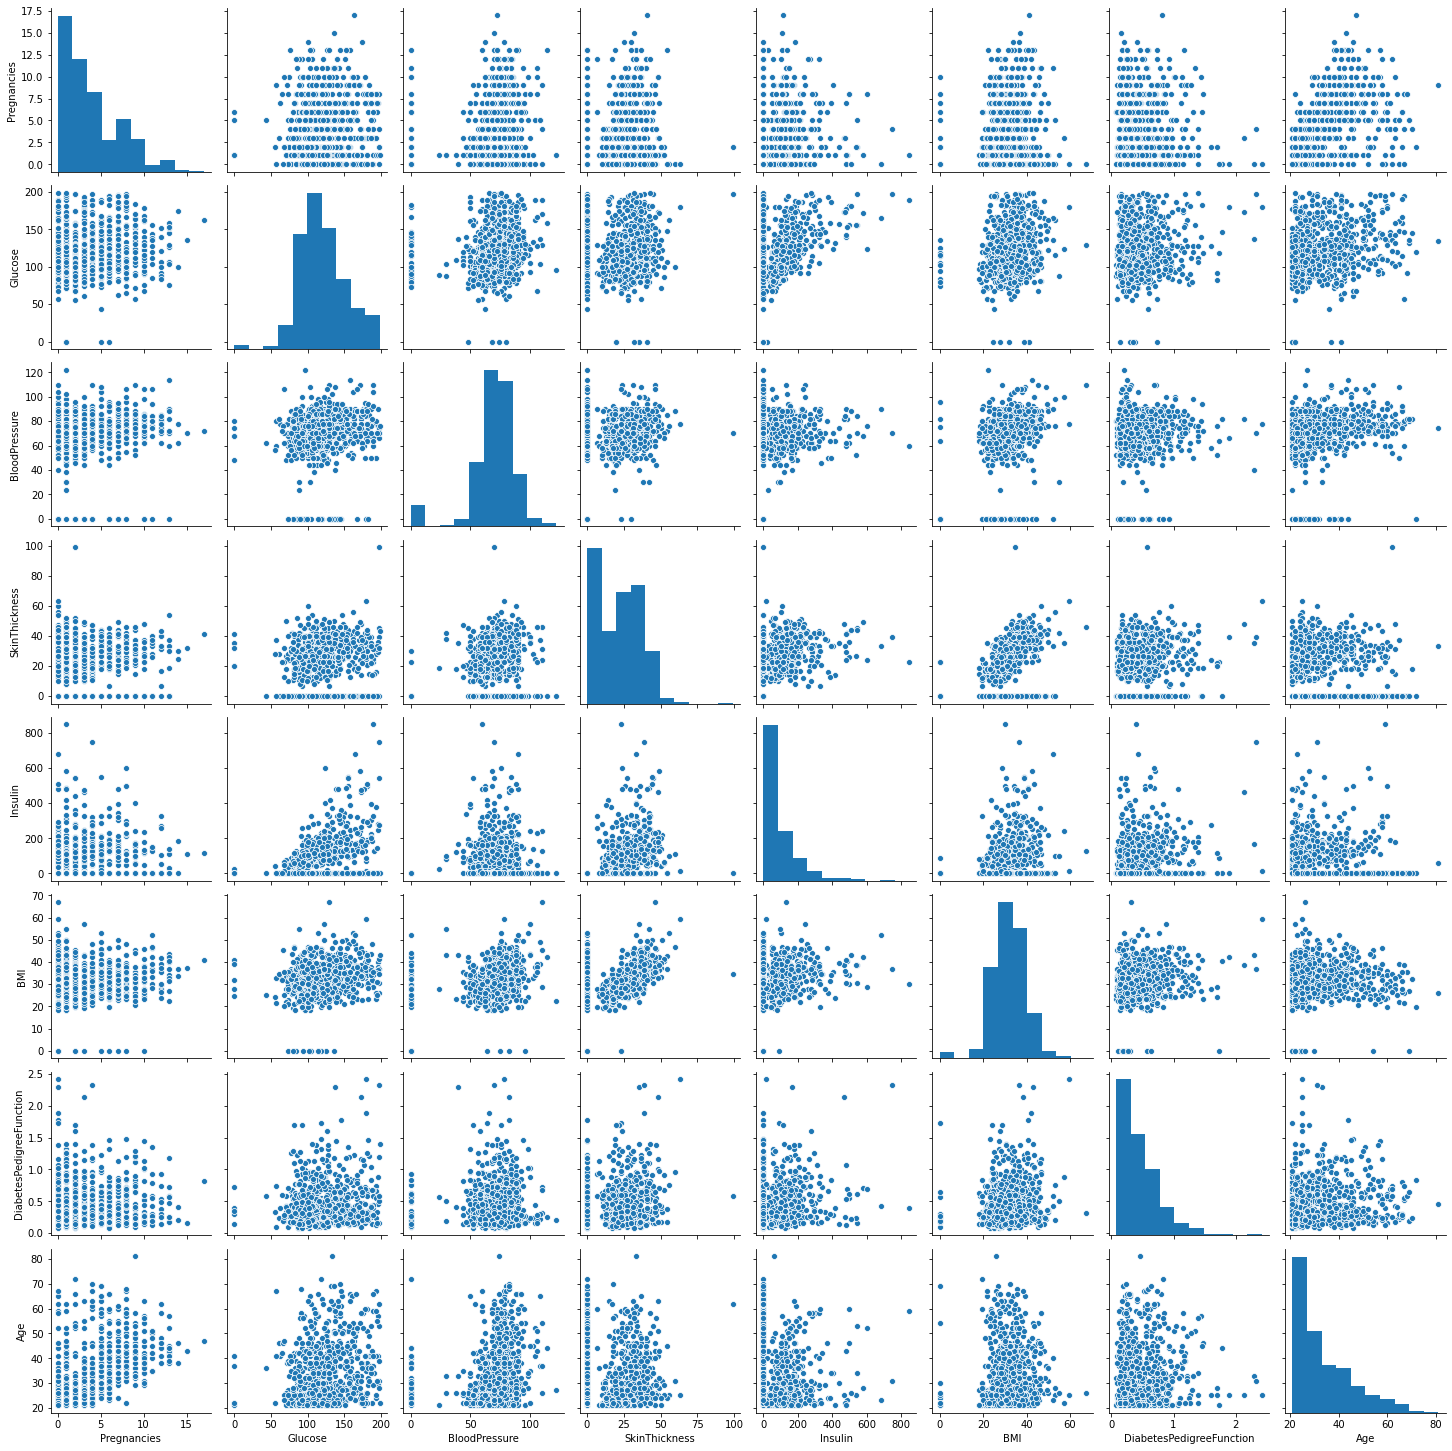

In [12]:
import seaborn as sns
sns.pairplot(data.iloc[:,:-1])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
model.score(x_test,y_test)

0.7445887445887446

In [32]:
model.score(x_train,y_train)

1.0

### Visualizing the tree

In [33]:
from sklearn import tree

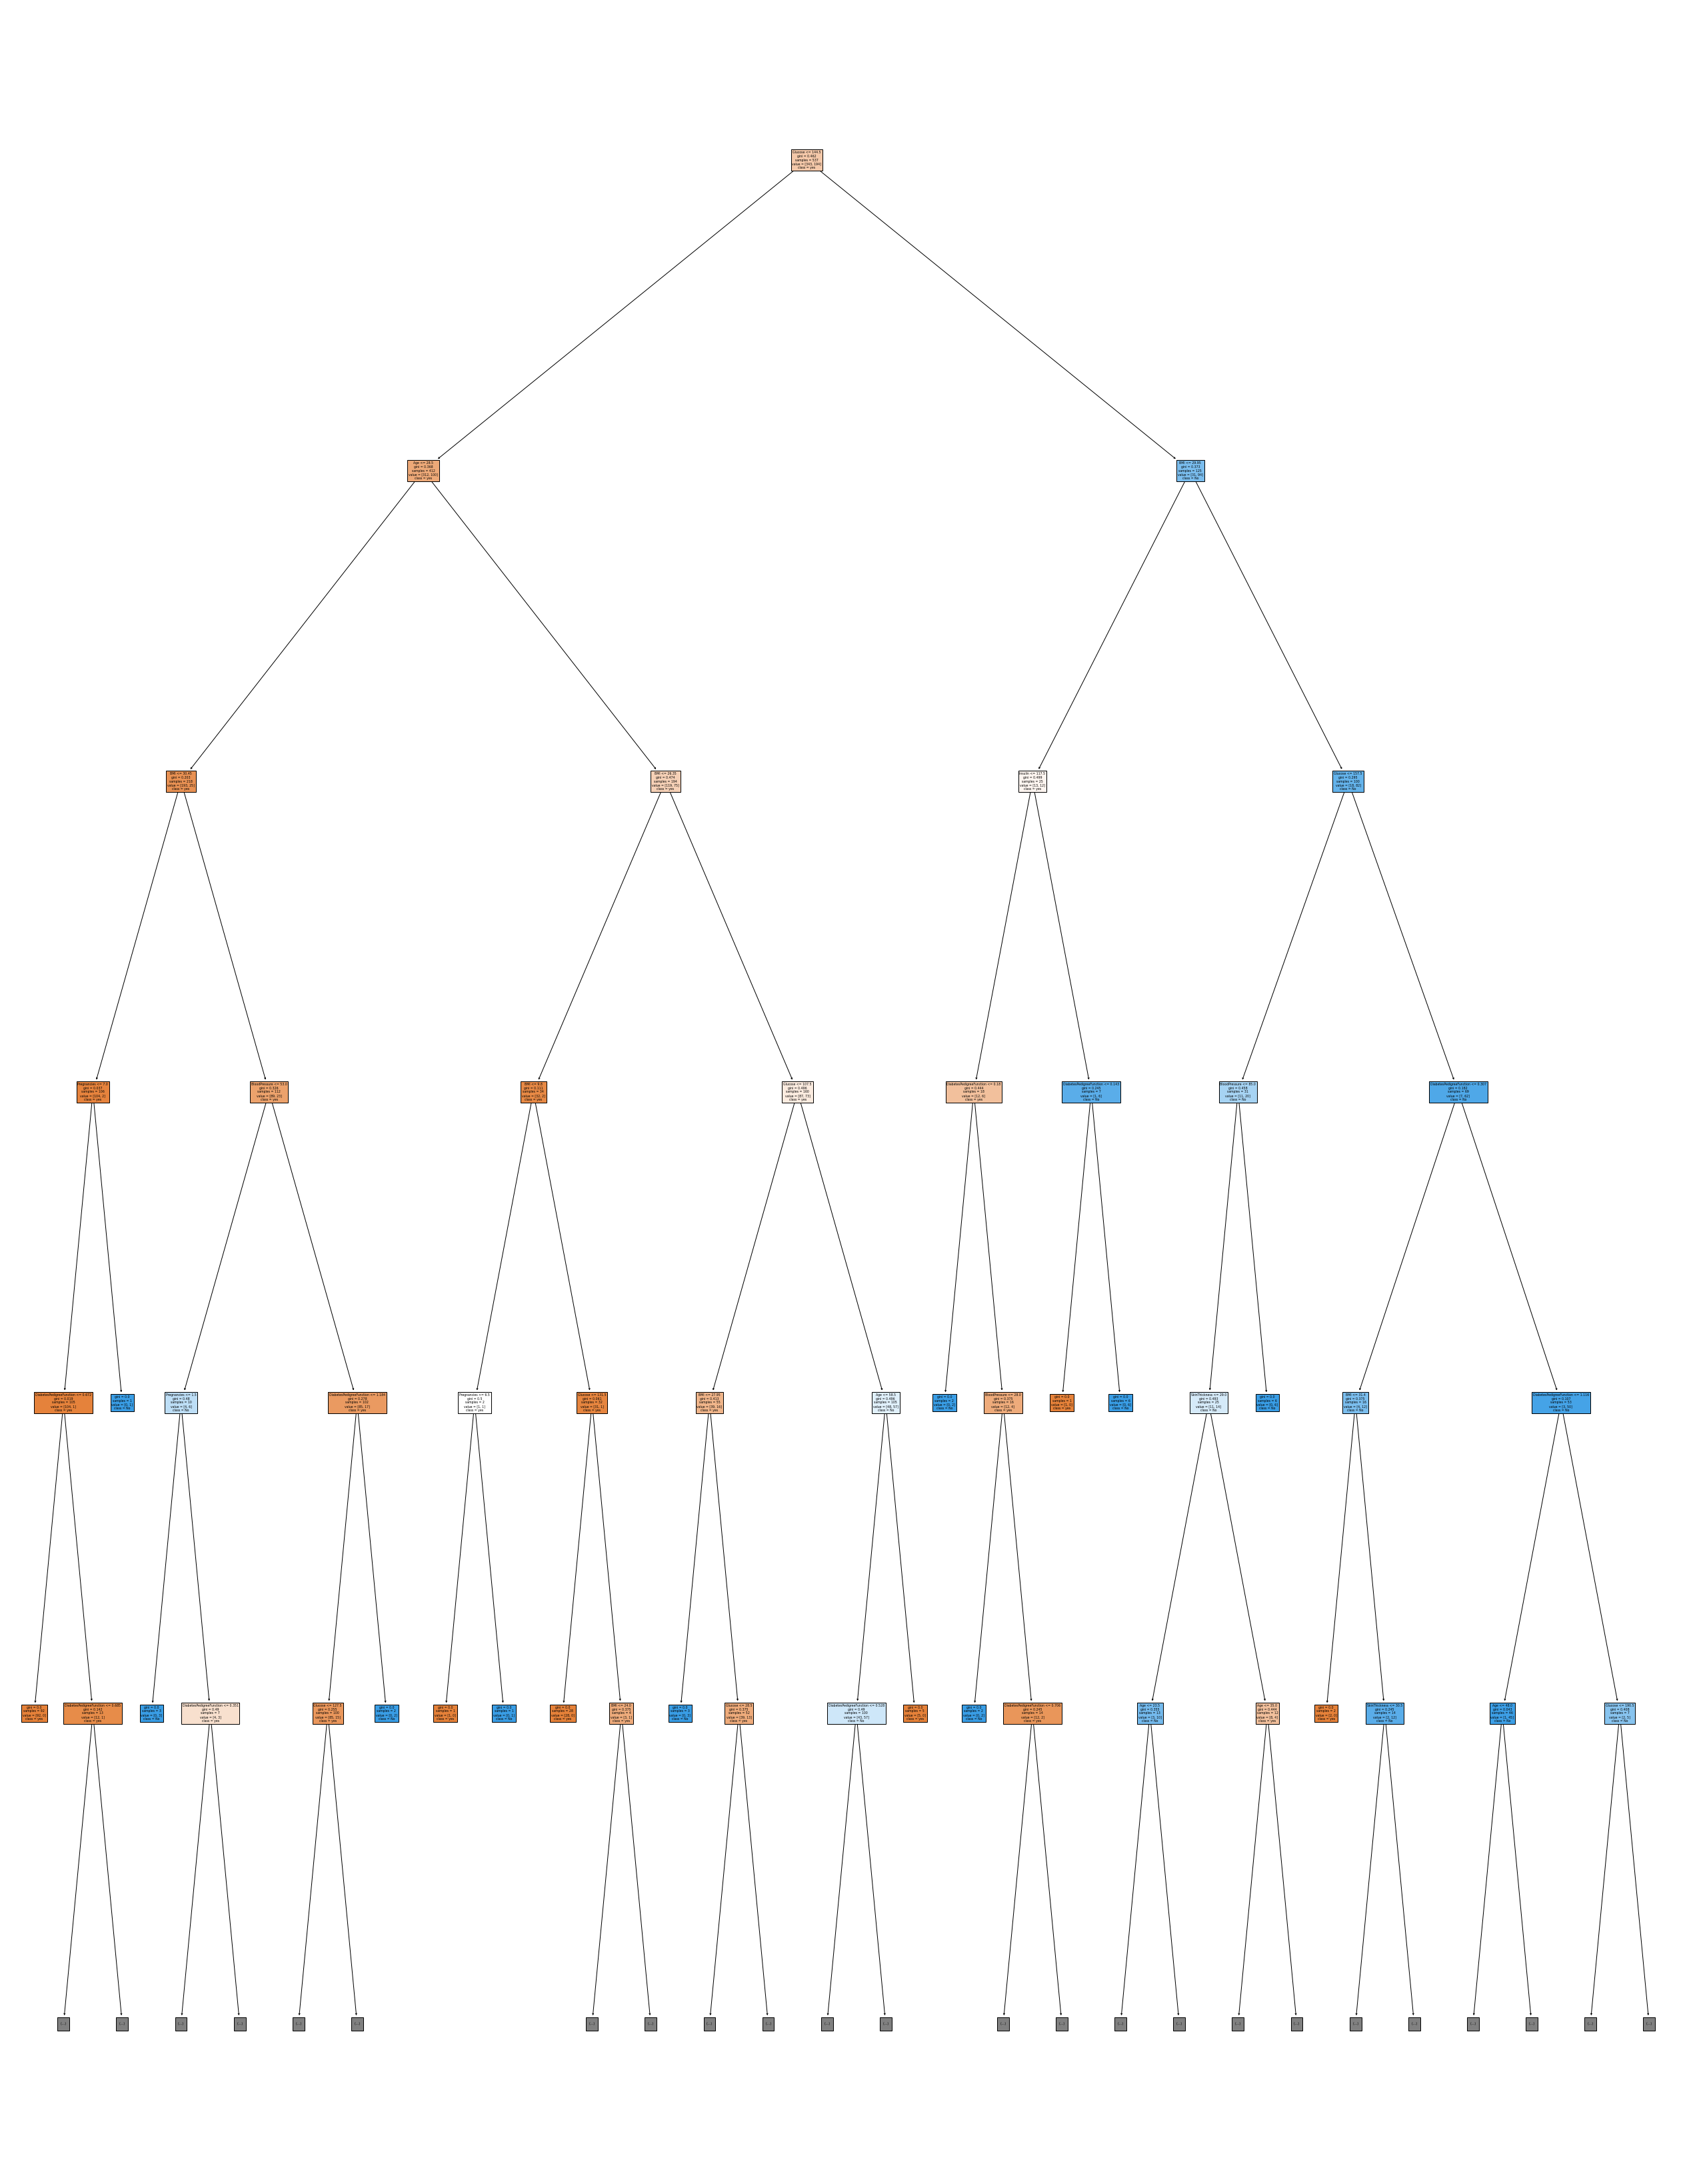

In [35]:
plt.figure(figsize=(45,60))
_ = tree.plot_tree(model,max_depth=5,feature_names=data.columns[:-1],class_names=['yes','No'],filled=True)